# Netflix TV Shows & Movies - Overview

## Set Up Environment

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in CSV file into a pandas dataframe.
netflix = pd.read_csv('data/netflix_titles.csv', index_col='show_id')
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Inspect and Clean Data

In [3]:
# This dataset has 7,787 rows and 11 columns.
netflix.shape

(7787, 11)

In [4]:
# Datatypes: 1 integer, 10 objects; 5 columns have null values.
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 730.0+ KB


In [5]:
netflix.describe(include='all')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,Movie,Death at a Funeral,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [6]:
# All entries are either a tv show or a movie.
netflix.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [7]:
netflix.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [8]:
# Duration is comes in 2 different measures: seasons and minutes.
netflix.duration.unique()[:5]

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min'], dtype=object)

In [9]:
# Entries for 'listed_in' can have more than one value.
netflix.listed_in.unique()[:5]

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas'], dtype=object)

In [10]:
netflix.country.unique()[:5]

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey'],
      dtype=object)

In [11]:
# There are no duplicate rows in this dataset.
sum(netflix.duplicated())

0

In [12]:
# Replace null values with 'Unknown' for text columns.
na_fill_cols = ['director', 'cast', 'country', 'rating']
for col in na_fill_cols:
    netflix[col].fillna('Unknown', inplace=True)

In [13]:
# Convert date_added to a datetime object.
netflix['date_added'] = pd.to_datetime(netflix.date_added)

### Description
This dataset consists of 7,787 TV shows and movies available on Netflix, globally, with release years spanning from 1925-2021.  The columns are as follows:
- show_id: The unique identifier for the show/movie.  I used this as the index.
- type: Whether it is a TV show or a movie.
- title: The name of the show/movie.
- director: A list of directors of the show/movie.
- cast: A list of cast members in the show/movie.
- country: A list of the countries where the show/movie is available.
- date_added: The date the show/movie became available on Netflix.
- release_year: The year the show/movie was released.
- rating: The rating of the show/movie based on level of maturity of content and language.
- duration: The number of seasons the show lasted or the movie in minutes.
- listed_in: A list of the genres the show/movie belongs to.
- description: A text description of the show/movie.

### Possible Analyses with this Dataset
#### Overview
1. Change in number of shows/movies available over time.
2. Proportion of shows vs movies.
3. Number of directors, cast members, countries available, and genres.
4. Average lengths for movies and tenure for shows.
5. Most and least common countries, genres, ratings, directors, and cast members.

#### Deep Dive
6. Length of cast by country.
7. Proportion of shows vs movies by country.
8. Range of directors in terms of number of countries.
9. Average movie length by genre and country.
10. TV show tenure by genre.
11. Deeper dive into specific regions (e.g. Africa).

#### Natural Language Processing
12. Most common words in descriptions overall and by genre.

## Analysis: Overview

### 1. Change in number of shows/movies available over time.

In [14]:
netflix.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [15]:
# Extract year from 'date_added' column.
netflix['year_added'] = netflix.date_added.dt.year.astype('int', errors='ignore')

In [16]:
netflix.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
show_id,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0


In [17]:
# Frequency distribution by the new 'year_added' column.
new_content_by_year = netflix.pivot_table(index='year_added', aggfunc=np.count_nonzero).title
new_content_by_year

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      25
2015.0      88
2016.0     443
2017.0    1225
2018.0    1685
2019.0    2153
2020.0    2009
2021.0     117
Name: title, dtype: int64

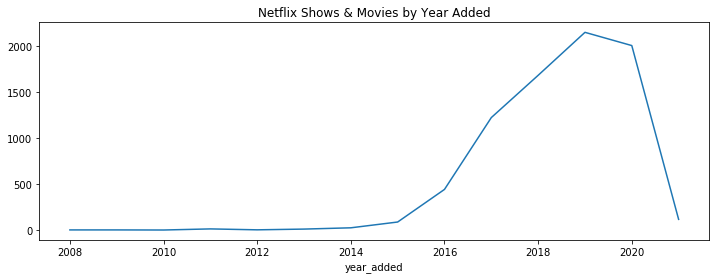

In [18]:
new_content_by_year.plot(figsize=(12,4), title='Netflix Shows & Movies by Year Added')

### 2. Proportion of shows vs movies.

In [19]:
netflix.type.value_counts(normalize=True) * 100

Movie      69.050982
TV Show    30.949018
Name: type, dtype: float64

### 3. Number of directors, cast members, countries available, and genres.

In [20]:
netflix.country.tail(3)

show_id
s7785                                  Unknown
s7786                                Australia
s7787    United Kingdom, Canada, United States
Name: country, dtype: object

In [21]:
def convert_to_list(text):
    if ',' not in text:
        return [text]
    else:
        converted_text = text.split(',')
        for x in converted_text:
            converted_text[converted_text.index(x)] = x.strip()
        return converted_text
    
# convert_to_list('Brazil')
convert_to_list('Brazil, Argentina, Peru')

['Brazil', 'Argentina', 'Peru']

In [22]:
# Take the columns with multiple possible values and present them in list format in new columns.
list_columns = ['director', 'cast', 'country', 'listed_in']
for col in list_columns:
    netflix['{}_list'.format(col)] = netflix[col].apply(convert_to_list)

netflix.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list
show_id,,,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,[Unknown],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],"[International TV Shows, TV Dramas, TV Sci-Fi ..."
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],"[Dramas, International Movies]"


In [23]:
# Use new list-format columns to count how many each have and save in new size columns.
new_list_columns = ['director_list', 'cast_list', 'country_list', 'listed_in_list']
for col in new_list_columns:
    netflix['{}_size'.format(col)] = netflix[col].apply(lambda x: len(x))
netflix.rename(columns={
    'director_list_size': 'director_size',
    'cast_list_size': 'cast_size',
    'country_list_size': 'country_size',
    'listed_in_list_size': 'listed_in_size'
}, inplace=True)
netflix.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,[Unknown],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],"[International TV Shows, TV Dramas, TV Sci-Fi ...",1,11,1,3
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],"[Dramas, International Movies]",1,6,1,2


In [24]:
# Frequency distribution for new 'director_size' column.
round(netflix.director_size.value_counts(normalize=True) * 100, 2)

1     92.90
2      6.32
3      0.41
4      0.17
5      0.06
10     0.04
11     0.03
12     0.03
7      0.01
13     0.01
9      0.01
8      0.01
Name: director_size, dtype: float64

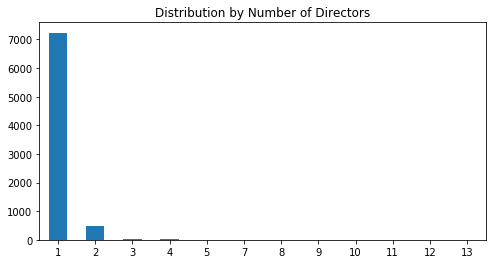

In [25]:
netflix.director_size.value_counts()[[1,2,3,4,5,7,8,9,10,11,12,13]].plot.bar(figsize=(8,4), rot=0, title='Distribution by Number of Directors')

In [26]:
# Frequency distribution for new 'cast_size' column.
round(netflix.cast_size.value_counts(normalize=True) * 100, 2)

1     19.85
10    15.90
8     13.59
9      8.01
6      7.44
7      6.75
11     5.14
5      4.29
12     3.24
4      3.17
2      2.38
3      2.18
13     2.00
14     1.35
15     1.35
16     0.83
17     0.46
18     0.44
20     0.30
19     0.28
21     0.14
22     0.12
24     0.09
23     0.09
25     0.09
26     0.08
28     0.08
27     0.04
47     0.04
33     0.04
34     0.04
38     0.03
40     0.03
41     0.03
39     0.03
50     0.03
30     0.03
29     0.01
44     0.01
32     0.01
31     0.01
42     0.01
Name: cast_size, dtype: float64

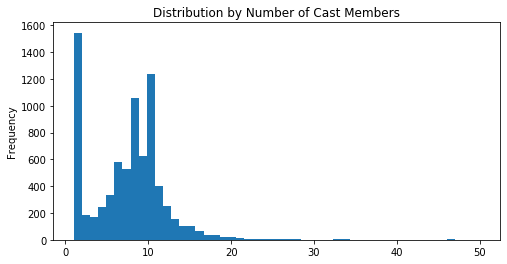

In [27]:
netflix.cast_size.plot.hist(figsize=(8,4), bins=50, title='Distribution by Number of Cast Members')

In [28]:
# Frequency distribution for new 'country_size' column.
round(netflix.country_size.value_counts(normalize=True) * 100, 2)

1     85.19
2      9.80
3      3.08
4      1.22
5      0.42
6      0.18
7      0.06
10     0.01
12     0.01
8      0.01
Name: country_size, dtype: float64

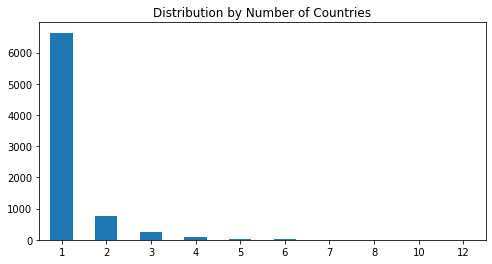

In [29]:
netflix.country_size.value_counts()[[1,2,3,4,5,6,7,8,10,12]].plot.bar(figsize=(8,4), rot=0, title='Distribution by Number of Countries')

In [30]:
# Frequency distribution for new 'listed_in_size' column.
round(netflix.listed_in_size.value_counts(normalize=True) * 100)

3    42.0
2    35.0
1    23.0
Name: listed_in_size, dtype: float64

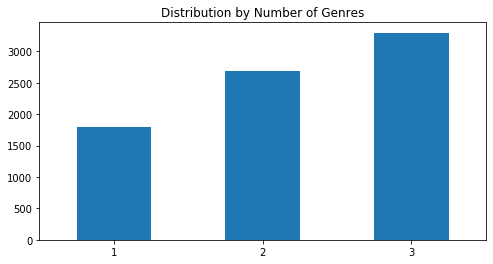

In [31]:
netflix.listed_in_size.value_counts()[[1,2,3]].plot.bar(figsize=(8,4), rot=0, title='Distribution by Number of Genres')

### 4. Average lengths for movies and tenure for shows.

In [32]:
netflix.duration.head()

show_id
s1    4 Seasons
s2       93 min
s3       78 min
s4       80 min
s5      123 min
Name: duration, dtype: object

In [33]:
# Split netflix dataframe into 2 new ones: 1 for tv shows, 1 for movies.
tv_shows = netflix[netflix.type == 'TV Show'].copy()
movies = netflix[netflix.type == 'Movie'].copy()

In [34]:
# Frequency distribution of tv seasons.
season_dist = pd.DataFrame(tv_shows.duration.value_counts())
season_dist['duration_pct'] = round(season_dist.duration / season_dist.duration.sum() * 100, 2)
season_dist.rename(columns={'duration': 'freq', 'duration_pct': 'percent'}, inplace=True)
season_dist

,freq,percent
1 Season,1608,66.72
2 Seasons,382,15.85
3 Seasons,184,7.63
4 Seasons,87,3.61
5 Seasons,58,2.41
6 Seasons,30,1.24
7 Seasons,19,0.79
8 Seasons,18,0.75
9 Seasons,8,0.33
10 Seasons,6,0.25


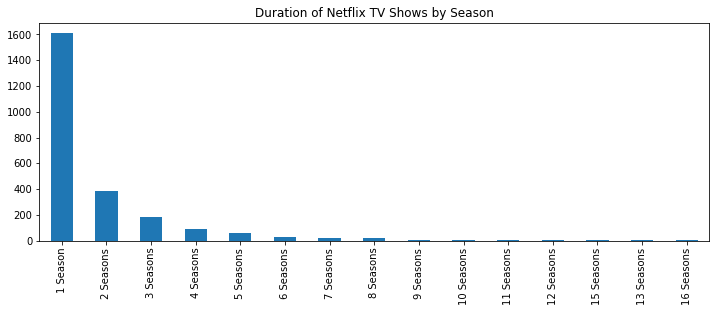

In [35]:
season_dist.freq.plot.bar(figsize=(12,4), title='Duration of Netflix TV Shows by Season')

In [36]:
# Convert 'durtion' column into an integer.
movies['duration'] = movies.duration.str.replace(' min', '').astype('int')
movies.duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

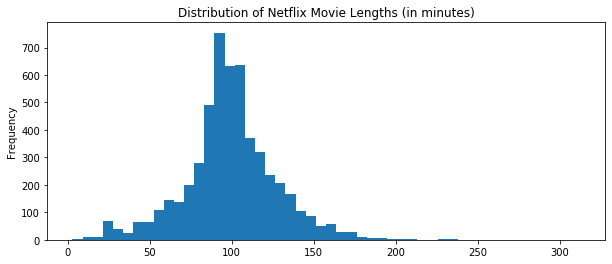

In [37]:
# The distribution of movie lengths is close to normal.
movies.duration.plot.hist(figsize=(10,4), bins=50, title='Distribution of Netflix Movie Lengths (in minutes)')

### 5. Most and least common countries, genres, ratings, directors, and cast members.

In [38]:
netflix.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,[Unknown],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],"[International TV Shows, TV Dramas, TV Sci-Fi ...",1,11,1,3
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],"[Dramas, International Movies]",1,6,1,2


In [39]:
# This function creates a list-format column and generates a frequency distribution for it.
def plot_freq_dist(df, col, category, num=50, highest=True, drop_unknown=False):
    frequencies = {}
    for entry in list(df[col]):
        for x in entry:
            if x not in frequencies:
                frequencies[x] = 1
            else:
                frequencies[x] += 1
    
    freq_dist = pd.DataFrame(pd.Series(frequencies), columns=['freq'])
    freq_dist['percent'] = freq_dist.freq / freq_dist.freq.sum() * 100
    freq_dist.sort_values(by='freq', ascending=highest, inplace=True)
    
    if drop_unknown:
        freq_dist.drop(index='Unknown', inplace=True)
    
    freq_dist[-num:].freq.plot.barh(figsize=(12,len(freq_dist[-num:])*.25), title='{} Distribution on Netflix'.format(category.title()))

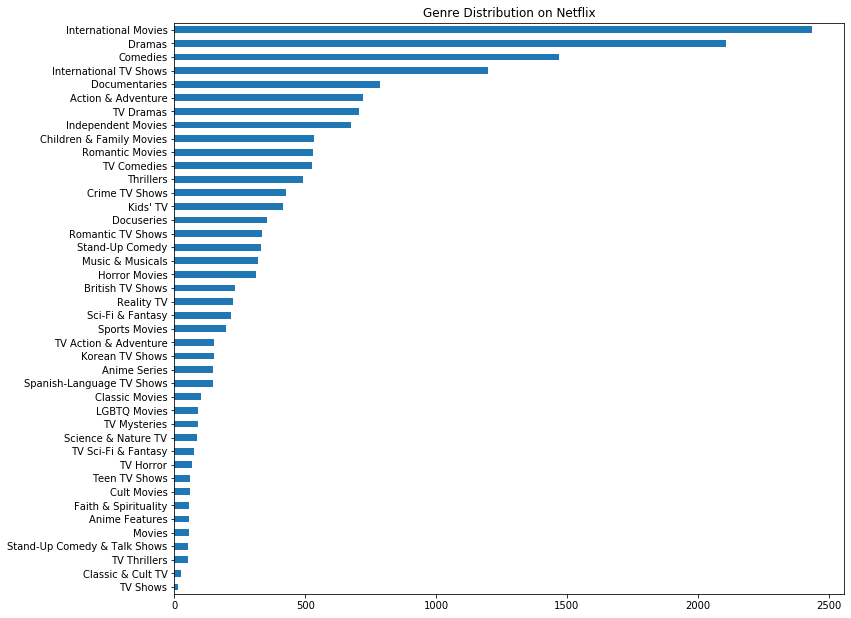

In [40]:
plot_freq_dist(netflix, 'listed_in_list', 'genre', 50)

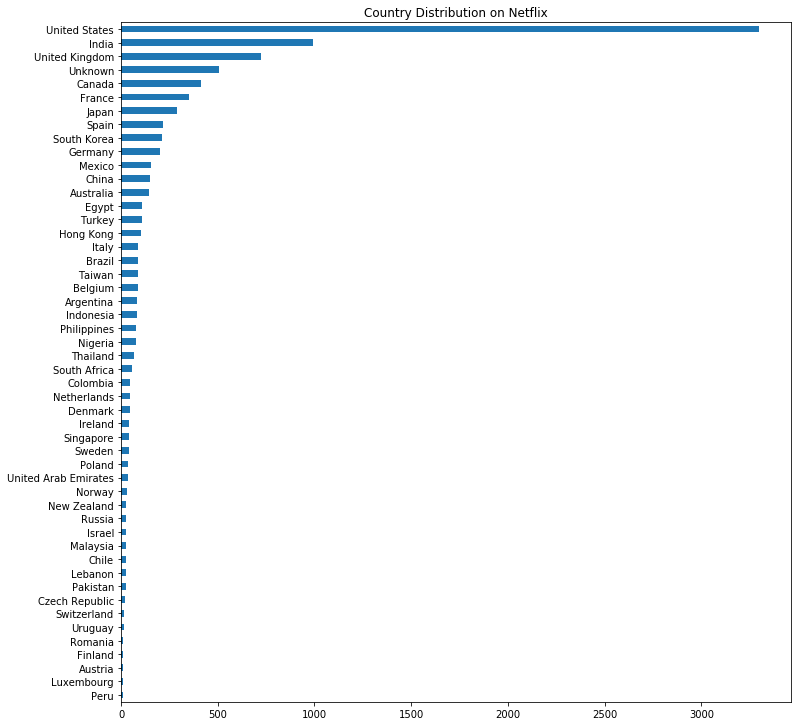

In [41]:
plot_freq_dist(netflix, 'country_list', 'country', 50)
# plot_freq_dist(netflix, 'country_list', 'country', 50, highest=False)

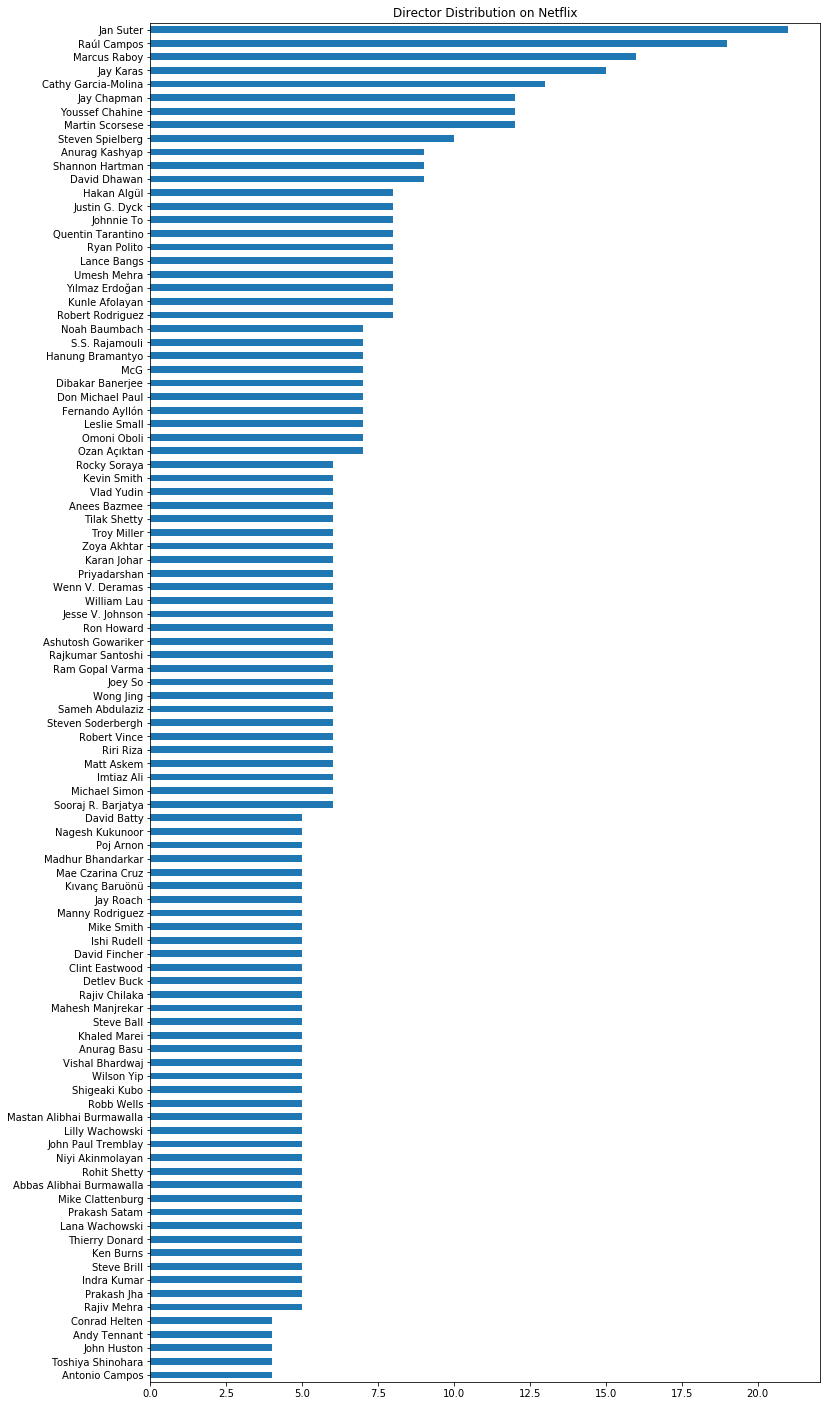

In [42]:
plot_freq_dist(netflix, 'director_list', 'director', 100, drop_unknown=True)

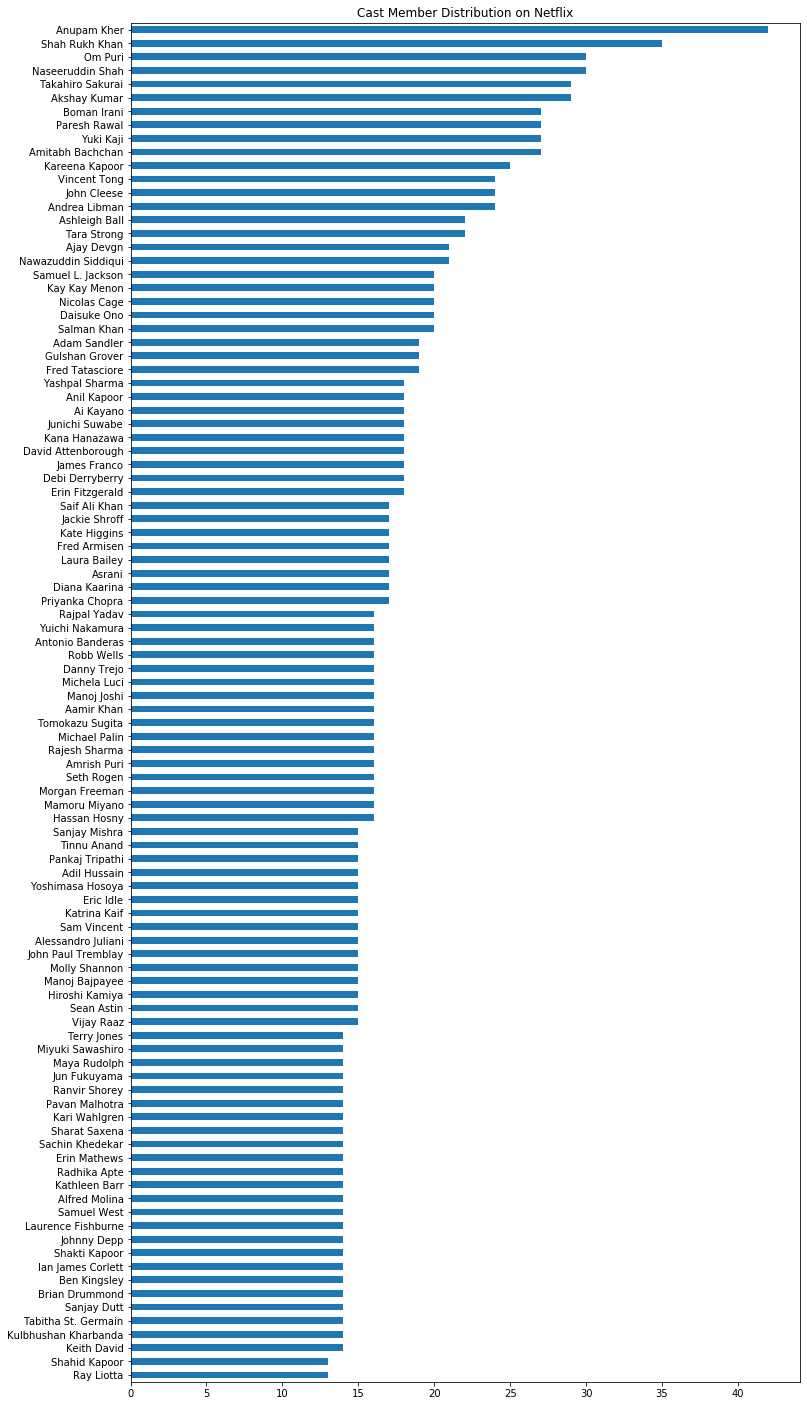

In [43]:
plot_freq_dist(netflix, 'cast_list', 'cast member', 100, drop_unknown=True)

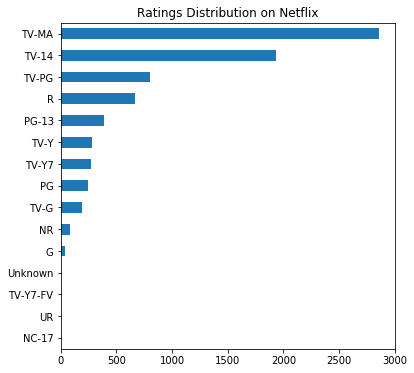

In [44]:
netflix.rating.value_counts(ascending=True).plot.barh(figsize=(6,6), title='Ratings Distribution on Netflix')

## Save Files

In [ ]:
netflix.to_csv('data/netflix_titles_clean.csv', index=False)
movies.to_csv('data/netflix_movies_clean.csv', index=False)
tv_shows.to_csv('data/netflix_tv_shows_clean.csv', index=False)